In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import christofides_p as cr
import graph_utils as gu


In [17]:
# helper function
def print_graph(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G,k=1000, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

 
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Tests

In [18]:
graphs = []
for i in range(100,101):
    print(f"Running for i={i}")

    for _ in range(1):
        connected = False
        G = gu.generer_graphe_tsp(i)
        while not connected:
            number_of_edges = len(G.edges())
            k = (i-2)/number_of_edges
            len_blockages_less_i = False
            while not len_blockages_less_i:
                blockages = gu.generer_blockages(G, percentage=k)
                len_blockages_less_i = len(blockages) < (i - 1)
            print(f'Len blockages {len(blockages)}')
            G_verify = G.copy()
            G_verify.remove_edges_from(blockages)
            connected = nx.is_connected(G_verify)
            print("Regenerating")
        graphs.append([G,blockages])
        G_cr_tour = cr.canadian_traveller_cyclic_routing(G,blockages)
        print("-----------")
        assert(nx.algorithms.has_eulerian_path(G_cr_tour))

Running for i=100
Len blockages 84
Regenerating
-----------


In [19]:
nx.algorithms.has_eulerian_path(G_cr_tour)

True

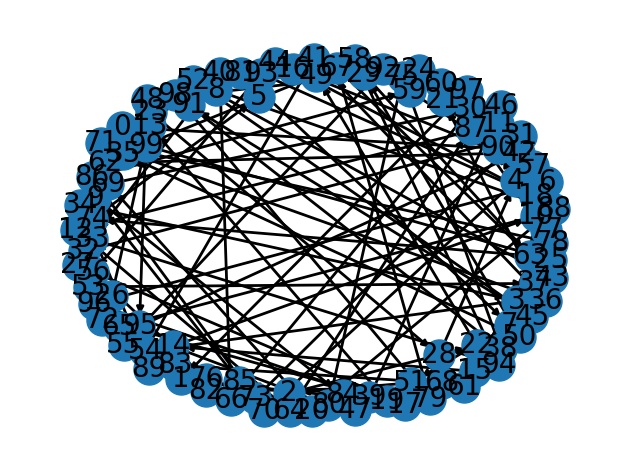

In [20]:
print_graph(G_cr_tour)

In [21]:
#print_graph(G)

In [22]:
G.remove_edges_from(graphs[0][1])

In [23]:
blockages = [(3,4),(4,5),(7,8),(9,10),(12,13),(12,14),(13,14),(16,4),(4,5),(8,10),(3,5),(5,14),(5,10),(10,13),(1,14)]
G = nx.Graph([(i,i+1) for i in range(1,16)] + [(16,1)])
G_cr_tour = cr.canadian_traveller_cyclic_routing(G,blockages)

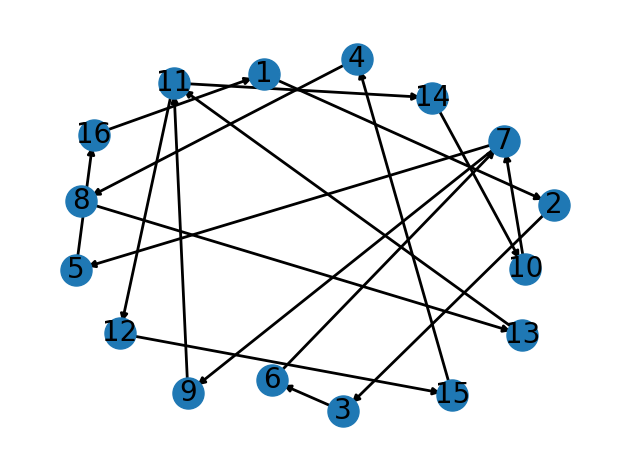

[(16, 1),
 (1, 2),
 (2, 3),
 (3, 6),
 (6, 7),
 (7, 9),
 (9, 11),
 (11, 12),
 (12, 15),
 (15, 4),
 (4, 8),
 (8, 13),
 (13, 11),
 (11, 14),
 (14, 10),
 (10, 7),
 (7, 5),
 (5, 16)]

In [24]:
print_graph(G_cr_tour)
G_cr_tour.edges()
list(nx.algorithms.eulerian_circuit(G_cr_tour))

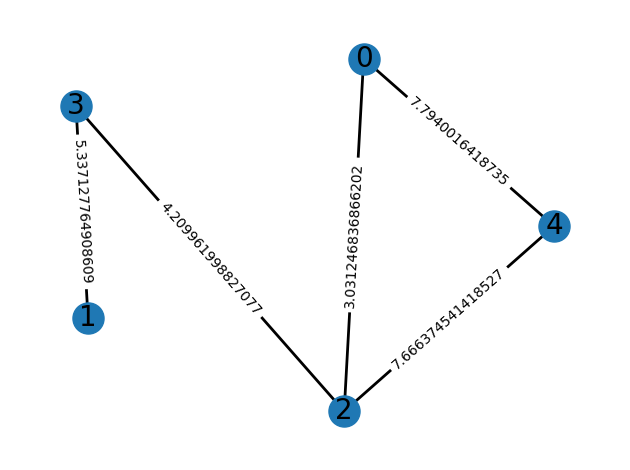

In [25]:
print_graph(G_relabled)

In [27]:
nx.algorithms.has_eulerian_path(G_relabled)

True